# Ping

Import des librairies

In [10]:
import pandas as pd
import numpy as np
import csv

Création des séries

In [11]:
dominantes = pd.Series(["Architecture et Sécurité des Réseaux", 
                        "Big Data pour la Transformation Numérique",
                        "Ingénieur d’Affaires : Informatique et Réseaux",
                        "Ingénierie des Services du Numérique",
                        "Ingénieur Finance",
                        "Automatique et Robotique Industrielle",
                        "Énergie et Développement Durable",
                        "Génie Électrique et Transport",
                        "Ingénieur d’Affaires : Distribution Énergie et Signaux",
                        "Mécatronique Génie Électrique",
                        "Ingénierie des Systèmes Embarqués : Véhicule Autonome",
                        "Ingénierie des Systèmes Embarqués : Objets Communicants",
                        "Ingénierie des Systèmes Médicaux",
                        "Electronique des Systèmes pour l’Automobile et l’Aéronautique",
                        "Ingénierie Télécom"]
                       ,index=["ASR",
                               "BDTN",
                               "IA-IR",
                               "ISN",
                               "IF",
                               "ARI",
                               "EDD",
                               "GET",
                               "IA-DES",
                               "MCTGE",
                               "ISE-VA",
                               "ISE-OC",
                               "ISYMED",
                               "ESAA",
                               "ICOM"])

In [12]:
dominantes

ASR                    Architecture et Sécurité des Réseaux
BDTN              Big Data pour la Transformation Numérique
IA-IR        Ingénieur d’Affaires : Informatique et Réseaux
ISN                    Ingénierie des Services du Numérique
IF                                        Ingénieur Finance
ARI                   Automatique et Robotique Industrielle
EDD                        Énergie et Développement Durable
GET                           Génie Électrique et Transport
IA-DES    Ingénieur d’Affaires : Distribution Énergie et...
MCTGE                         Mécatronique Génie Électrique
ISE-VA    Ingénierie des Systèmes Embarqués : Véhicule A...
ISE-OC    Ingénierie des Systèmes Embarqués : Objets Com...
ISYMED                     Ingénierie des Systèmes Médicaux
ESAA      Electronique des Systèmes pour l’Automobile et...
ICOM                                     Ingénierie Télécom
dtype: object

In [13]:
departements = pd.Series(["GEE",
                          "TIC",
                          "TIC",
                          "TIC",
                          "TIC", 
                          "GEE",
                          "GEE",
                          "GEE",
                          "GEE",
                          "ET",
                          "ET", 
                          "GEE",
                          "GEE",
                          "TIC",
                          "TIC"]
                        ,index=["ASR",
                               "BDTN",
                               "IA-IR",
                               "ISN",
                               "IF",
                               "ARI",
                               "EDD",
                               "GET",
                               "IA-DES",
                               "MCTGE",
                               "ISE-VA",
                               "ISE-OC",
                               "ISYMED",
                               "ESAA",
                               "ICOM"])

In [14]:
myData = pd.DataFrame(dominantes, columns=['Dominantes'])
myData['Departement'] = departements
myData['Code'] = dominantes.index

In [15]:
myData.head()

,Dominantes,Departement,Code
ASR,Architecture et Sécurité des Réseaux,GEE,ASR
BDTN,Big Data pour la Transformation Numérique,TIC,BDTN
IA-IR,Ingénieur d’Affaires : Informatique et Réseaux,TIC,IA-IR
ISN,Ingénierie des Services du Numérique,TIC,ISN
IF,Ingénieur Finance,TIC,IF


In [16]:
departList = pd.Series([ "GEE",
                        "TIC",
                        "ET"])

In [17]:
prenoms = pd.Series(["Lucas",
"Romain",
"Charly",
"Abdou",
"Vincent",
"Paul" ])

In [18]:
codeDominantes = pd.Series(["ICOM",
"BDTN",
"ICOM",
"EDD",
"IA-IR",
"ISYMED" ])

In [19]:
pingMembers = pd.DataFrame({ 'Prénom' : prenoms,
'Code': codeDominantes})
print(pingMembers)

     Code   Prénom
0    ICOM    Lucas
1    BDTN   Romain
2    ICOM   Charly
3     EDD    Abdou
4   IA-IR  Vincent
5  ISYMED     Paul


Calcul du poucentage d'élèves par département

In [20]:
pingDepartements = pingMembers['Code'].apply(lambda x: myData.loc[x]['Departement'])

In [27]:
results = []
resultsDict = {}

for depart in departList.iteritems():
    count = pingDepartements[pingDepartements == depart[1] ].count()
    percentage = count / pingMembers['Prénom'].count() * 100
    results.append("{};{}".format(depart[1], percentage))
    resultsDict[depart[1]] = percentage
    print("Il y a {}% élève(s) du département {} dans ce ping".format(percentage,depart[1]))

Il y a 33.33333333333333% élève(s) du département GEE dans ce ping
Il y a 66.66666666666666% élève(s) du département TIC dans ce ping
Il y a 0.0% élève(s) du département ET dans ce ping


Sauvegarde des résultats sous csv

In [22]:
file = open("results.csv", "w")

writer = csv.writer(file)
writer.writerow(["departement;pourcentage"])
                
for item in results:
    print(item)
    writer.writerow([item])

file.close()

GEE;33.33333333333333
TIC;66.66666666666666
ET;0.0


### Visualisation

In [23]:
import matplotlib.pyplot as plt

 #### Diagramme en barre

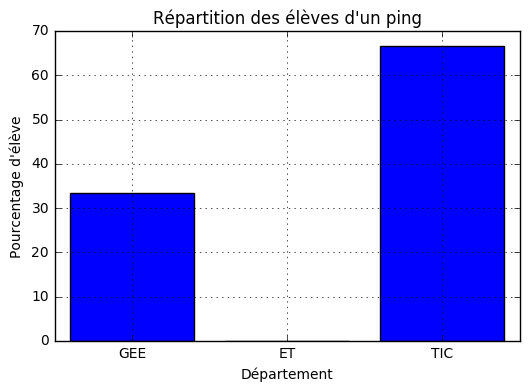

In [52]:
plt.xlabel('Département')
plt.ylabel('Pourcentage d\'élève')
plt.title('Répartition des élèves d\'un ping')

plt.bar(range(len(resultsDict)), resultsDict.values(), align='center')
plt.xticks(range(len(resultsDict)), resultsDict.keys())

plt.grid(True)
plt.show()

#### Camembert

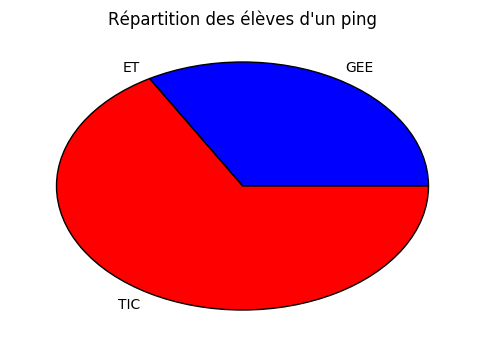

In [49]:
plt.pie([float(v) for v in resultsDict.values()], labels=resultsDict.keys(),
           autopct=None)
plt.title('Répartition des élèves d\'un ping')
plt.show()

#### Deux graphiques sur même figure

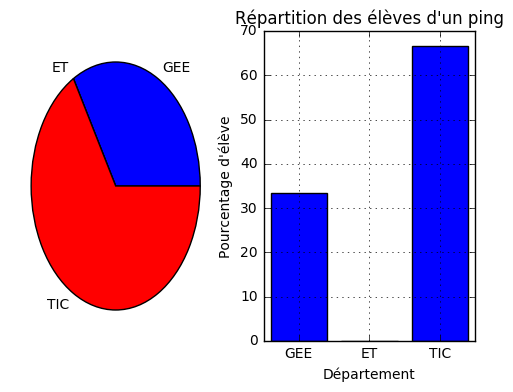

In [51]:
plt.subplot(121)
plt.pie([float(v) for v in resultsDict.values()], labels=resultsDict.keys(),
           autopct=None)

plt.subplot(122)
plt.xlabel('Département')
plt.ylabel('Pourcentage d\'élève')
plt.title('Répartition des élèves d\'un ping')

plt.bar(range(len(resultsDict)), resultsDict.values(), align='center')
plt.xticks(range(len(resultsDict)), resultsDict.keys())

plt.grid(True)

plt.show()